## IMPORT TOOLS AND LIBRARIES

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

pd.set_option('display.width', 1000000000)

## IMPORT DATA

In [2]:
flatPricesData = pd.read_csv('flat-prices.csv', parse_dates=['month'])
flatPrices = pd.DataFrame(flatPricesData)
flatPrices

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
125459,2022-04-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,64 years 10 months,739388.0
125460,2022-04-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,07 TO 09,142.0,Apartment,1988,64 years 11 months,773000.0
125461,2022-01-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,164.0,Multi Generation,1987,65 years,785000.0
125462,2022-02-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,171.0,Multi Generation,1987,64 years 11 months,842000.0


## TRANSFORM DATA

##### CONVERT REMAINING_LEASE COLUMN INTO YEARS

In [3]:
rem_lease = []
for i in range(len(flatPrices)):
    rem_time = flatPrices['remaining_lease'].loc[i]
    rem_time_ls = re.findall(r'[0-9]+', rem_time)
    if len(rem_time_ls) == 2:
        years, months = rem_time_ls
        rem_lease.append(float(years) + float(int(months)/12))
    elif len(rem_time_ls) == 1:
        rem_lease.append(float(years))

flatPrices['remaining_lease'] = rem_lease

##### CONVERT LEASE_COMMENCE_DATE INTO DATE

In [4]:
lease_date = []
for i in range(len(rem_lease)):
    leasedate = flatPrices['month'].loc[i] - datetime.timedelta(days=365*(99-rem_lease[i]))
    lease_date.append(leasedate.date())

flatPrices['lease_commence_date'] = lease_date
flatPrices['lease_commence_date'] = flatPrices['lease_commence_date'].astype('datetime64[ns]')

##### DISPLAY FINAL DATAFRAME

In [5]:
flatPrices

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-05-12,61.333333,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-08-11,60.583333,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-06-11,62.416667,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-02-10,62.083333,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-06-11,62.416667,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
125459,2022-04-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988-02-08,64.833333,739388.0
125460,2022-04-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,07 TO 09,142.0,Apartment,1988-03-09,64.916667,773000.0
125461,2022-01-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,164.0,Multi Generation,1987-01-10,64.000000,785000.0
125462,2022-02-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,171.0,Multi Generation,1988-01-10,64.916667,842000.0


##### DISPLAY DATA INFO

In [6]:
flatPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125464 entries, 0 to 125463
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                125464 non-null  datetime64[ns]
 1   town                 125464 non-null  object        
 2   flat_type            125464 non-null  object        
 3   block                125464 non-null  object        
 4   street_name          125464 non-null  object        
 5   storey_range         125464 non-null  object        
 6   floor_area_sqm       125464 non-null  float64       
 7   flat_model           125464 non-null  object        
 8   lease_commence_date  125464 non-null  datetime64[ns]
 9   remaining_lease      125464 non-null  float64       
 10  resale_price         125464 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 10.5+ MB


##### SAVE UPDATED DATA

In [7]:
flatPrices.to_csv('flat-prices-new.csv')

## FIND AND VISUALISE DATA PATTERNS

##### RELATIONSHIP BETWEEN TOWN AND RESALE PRICE

                  resale_price
town                          
YISHUN           389971.720462
WOODLANDS        404796.475367
BUKIT BATOK      405200.718277
SEMBAWANG        405278.575283
JURONG WEST      410407.481433
ANG MO KIO       420980.608325
CHOA CHU KANG    428258.611525
BEDOK            429815.837846
JURONG EAST      434722.584863
BUKIT PANJANG    449052.148512
GEYLANG          454117.474783
HOUGANG          459349.099188
SENGKANG         462736.794556
PUNGGOL          480477.718727
TAMPINES         494287.589122
TOA PAYOH        496860.271569
CLEMENTI         503751.647527
SERANGOON        509081.095652
KALLANG/WHAMPOA  519612.484734
PASIR RIS        520435.026793
MARINE PARADE    527982.138462
BUKIT MERAH      579324.855715
QUEENSTOWN       591739.841556
BISHAN           649937.051534
CENTRAL AREA     652394.134171
BUKIT TIMAH      718441.769231


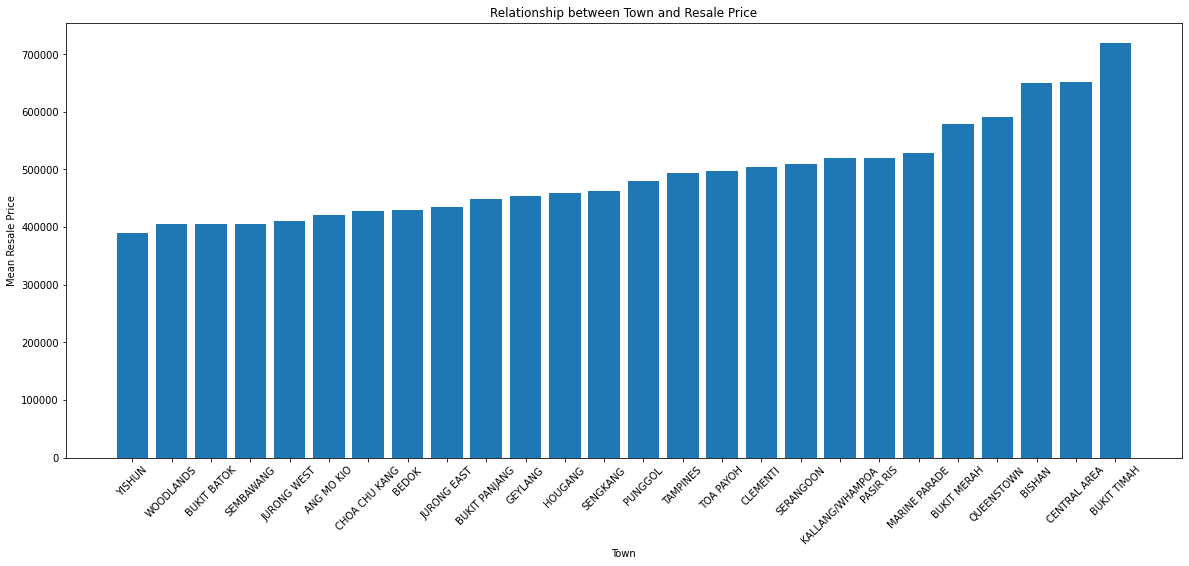

In [8]:
town_meanprice_data = flatPrices[['town', 'resale_price']].groupby('town').mean().sort_values('resale_price')
print(town_meanprice_data)

town_meanprice_fig, town_meanprice = plt.subplots(figsize=(20, 8))
town_meanprice.bar(town_meanprice_data.index, town_meanprice_data['resale_price'])
plt.xticks(rotation=45)
town_meanprice.set(xlabel='Town', ylabel='Mean Resale Price', title='Relationship between Town and Resale Price');

##### RELATIONSHIP BETWEEN FLAT TYPE AND RESALE PRICE

                   resale_price
flat_type                      
1 ROOM            188789.568627
2 ROOM            244099.507293
3 ROOM            323140.328187
4 ROOM            459953.605080
5 ROOM            556920.628423
EXECUTIVE         654047.594581
MULTI-GENERATION  806053.750000


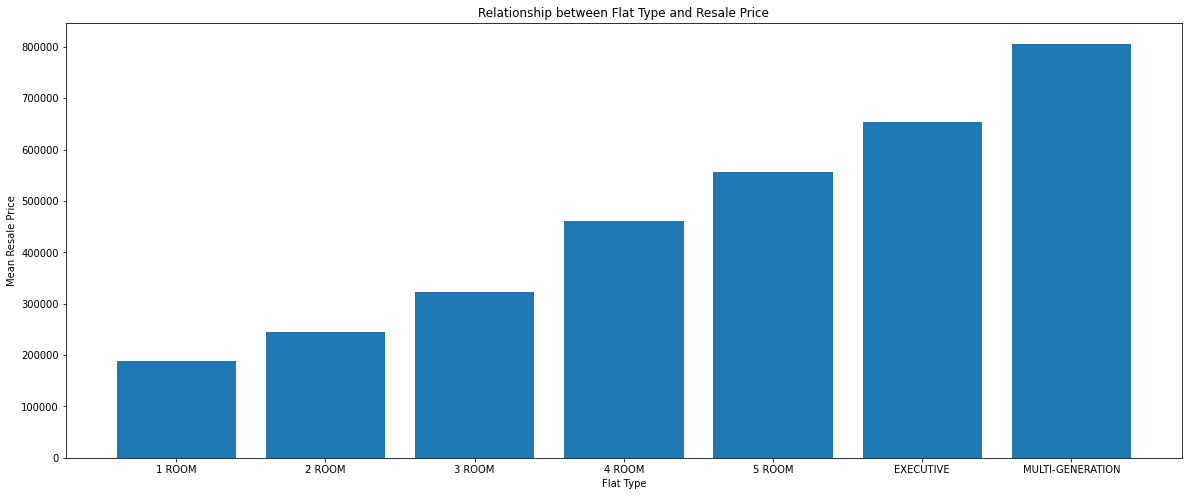

In [9]:
flattype_meanprice_data = flatPrices[['flat_type', 'resale_price']].groupby('flat_type').mean()
print(flattype_meanprice_data)

flattype_meanprice_fig, flattype_meanprice = plt.subplots(figsize=(20, 8))
flattype_meanprice.bar(flattype_meanprice_data.index, flattype_meanprice_data['resale_price'])
flattype_meanprice.set(xlabel='Flat Type', ylabel='Mean Resale Price', title='Relationship between Flat Type and Resale Price');

##### RELATIONSHIP BETWEEN STOREY RANGE AND RESALE PRICE

                    resale_price
storey_range                    
01 TO 03       418443.9095100812
04 TO 06       437240.8792181511
07 TO 09       448914.9646586529
10 TO 12       462596.8569887285
13 TO 15       498648.2248731176
16 TO 18       537887.3102579961
19 TO 21       606216.5734060403
22 TO 24       633177.1049772727
25 TO 27       681048.9618687873
28 TO 30       773126.6445497631
31 TO 33       819379.6973293768
34 TO 36       834908.5441584159
37 TO 39       850796.4014084507
40 TO 42       911840.4054054054
43 TO 45       969099.3333333334
46 TO 48      1056647.6412903226
49 TO 51      1096353.4545454546


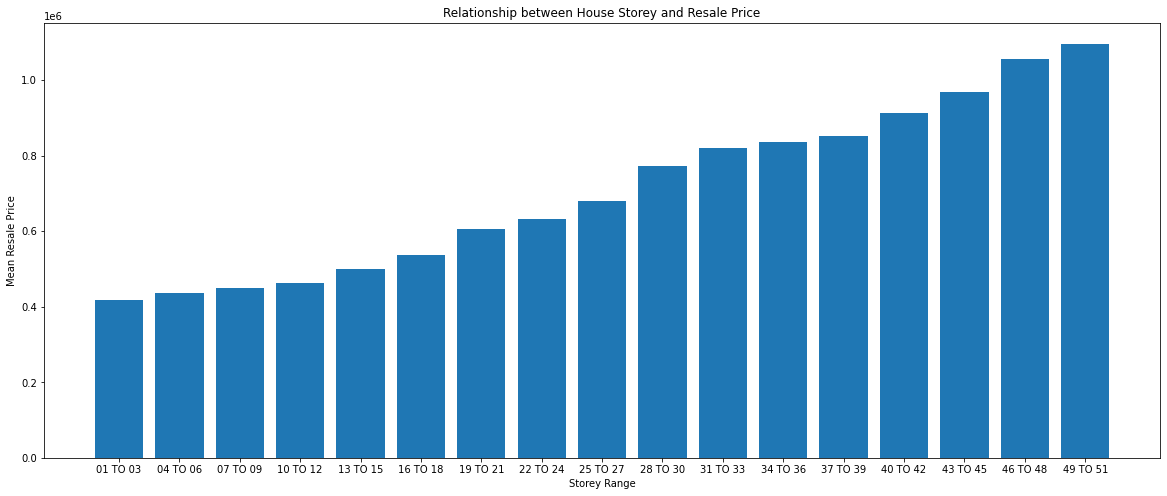

In [10]:
storeyrange_meanprice_data = flatPrices[['storey_range', 'resale_price']].groupby('storey_range').mean()
print(storeyrange_meanprice_data.astype(str))

storeyrange_meanprice_fig, storeyrange_meanprice = plt.subplots(figsize=(20, 8))
storeyrange_meanprice.bar(storeyrange_meanprice_data.index, storeyrange_meanprice_data['resale_price'])
storeyrange_meanprice.set(xlabel='Storey Range', ylabel='Mean Resale Price', title='Relationship between House Storey and Resale Price');

##### RELATIONSHIP BETWEEN FLAT MODEL AND RESALE PRICE

                              resale_price
flat_model                                
2-room                            264500.0
New Generation          342234.88907454535
Simplified               354533.0882952692
Model A2                361646.39074200136
Standard                410035.31506849313
Model A                     446462.7712035
Improved                 474538.9576018143
Premium Apartment       500135.29790040007
Apartment                637521.8533519777
Improved-Maisonette      683098.6666666666
Adjoined flat            694089.7876106194
Maisonette               700189.4456781915
Model A-Maisonette       722776.0176991151
DBSS                     749555.1433978133
Premium Maisonette                775000.0
Multi Generation                 806053.75
Terrace                   844378.065945946
Premium Apartment Loft   920913.8518518518
Type S1                  959608.9692982456
Type S2                 1076087.9176296296


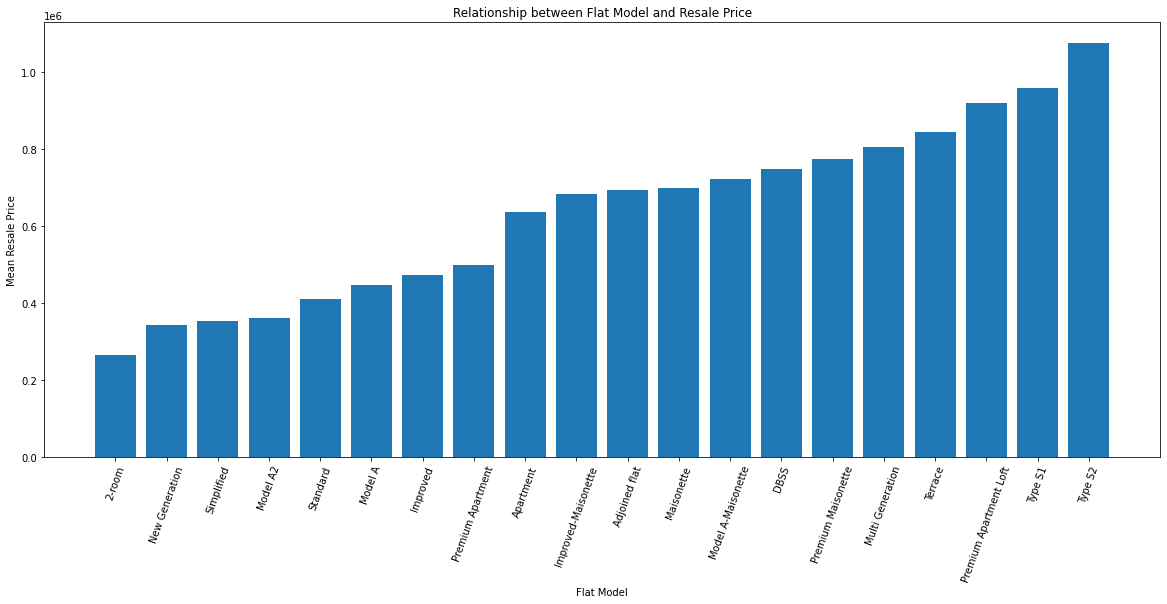

In [11]:
flatmodel_meanprice_data = flatPrices[['flat_model', 'resale_price']].groupby('flat_model').mean().sort_values('resale_price')
print(flatmodel_meanprice_data.astype(str))

flatmodel_meanprice_fig, flatmodel_meanprice = plt.subplots(figsize=(20, 8))
flatmodel_meanprice.bar(flatmodel_meanprice_data.index, flatmodel_meanprice_data['resale_price'])
plt.xticks(rotation=70)
flatmodel_meanprice.set(xlabel='Flat Model', ylabel='Mean Resale Price', title='Relationship between Flat Model and Resale Price');

##### RELATIONSHIP BETWEEN FLOOR AREA AND RESALE PRICE

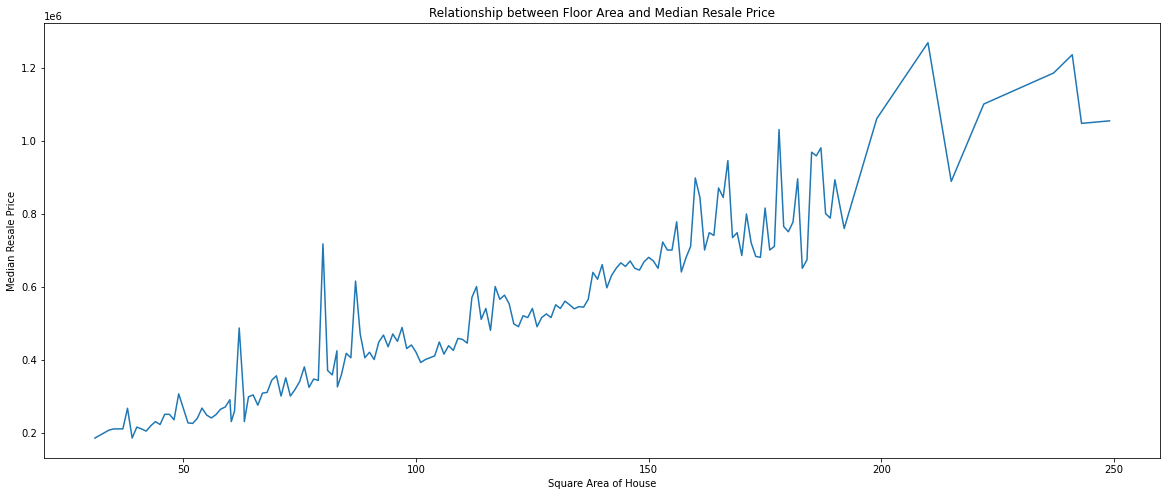

In [12]:
flrarea_medprice_data = flatPrices[['floor_area_sqm', 'resale_price']].groupby('floor_area_sqm').median()

flrarea_medprice_fig, flrarea_medprice = plt.subplots(figsize=(20, 8))
flrarea_medprice.plot(flrarea_medprice_data.index.astype(float), flrarea_medprice_data['resale_price'])
flrarea_medprice.set(xlabel='Square Area of House', ylabel='Median Resale Price', title='Relationship between Floor Area and Median Resale Price');

##### MEDIAN FLAT PRICES OVER TIME FROM 2017 TO 2022

            resale_price
month                   
2017-01-01      405000.0
2017-02-01      415000.0
2017-03-01      415000.0
2017-04-01      408000.0
2017-05-01      410000.0
...                  ...
2021-12-01      505000.0
2022-01-01      500000.0
2022-02-01      508000.0
2022-03-01      510000.0
2022-04-01      518000.0

[64 rows x 1 columns]


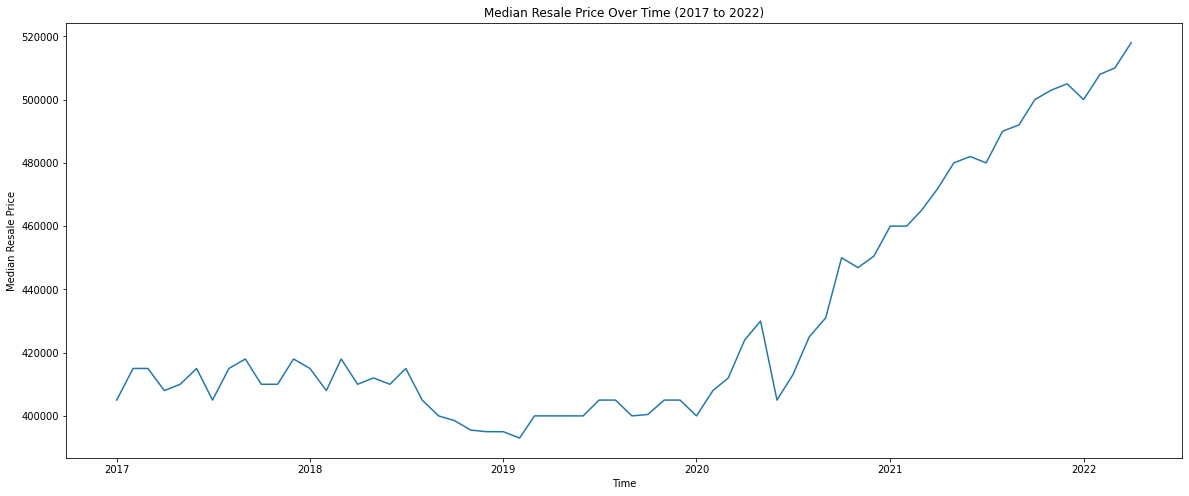

In [13]:
month_medprice_data = flatPrices[['month', 'resale_price']].groupby('month').median()
print(month_medprice_data)

month_medprice_fig, month_medprice = plt.subplots(figsize=(20, 8))
month_medprice.plot(month_medprice_data.index, month_medprice_data['resale_price'])
month_medprice.set(xlabel='Time', ylabel='Median Resale Price', title='Median Resale Price Over Time (2017 to 2022)');